## Подготовка

### Пакеты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Данные

Архив содержит файл gar_places.csv. Который содержит выгрузку части данных из архива ГАР.
Каждая строчка - это набор адресообразующих элементов какого-либо места (place) уровня до улиц.
Для каждого уникального значения кода ОКТМО выгружено по не более 10 примеров адресов мест.

In [2]:
!unzip -nq archive.zip

In [2]:
df = pd.read_csv("places_address_elements.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519319 entries, 0 to 1519318
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   region_name                1519319 non-null  object
 1   region_type_name           1519319 non-null  object
 2   region_type_name_short     1519319 non-null  object
 3   area_name                  1126760 non-null  object
 4   area_type_name             1126760 non-null  object
 5   area_type_name_short       1126760 non-null  object
 6   city_name                  1405599 non-null  object
 7   city_type_name             1405599 non-null  object
 8   city_type_name_short       1405599 non-null  object
 9   territory_name             429869 non-null   object
 10  territory_type_name        429869 non-null   object
 11  territory_type_name_short  429869 non-null   object
 12  street_name                1173257 non-null  object
 13  street_type_name           

Удалим стролбцы, которые не нужны при последующем анализе данных

In [4]:
df.head(2)

,region_name,region_type_name,region_type_name_short,area_name,area_type_name,area_type_name_short,city_name,city_type_name,city_type_name_short,territory_name,territory_type_name,territory_type_name_short,street_name,street_type_name,street_type_name_short
0,Адыгея,Республика,Респ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Башкортостан,Республика,Респ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[[123]]

,region_name,region_type_name,region_type_name_short,area_name,area_type_name,area_type_name_short,city_name,city_type_name,city_type_name_short,territory_name,territory_type_name,territory_type_name_short,street_name,street_type_name,street_type_name_short
123,Санкт-Петербург,Город,г,NaN,NaN,NaN,Санкт-Петербург,Город,г,NaN,NaN,NaN,Петровская,Аллея,аллея


## Первичный анализ данных


### Незаполненные данные

In [6]:
for col in df.columns:
    s = df[col].isna().sum()
    if (s>0):
        print(f"{col} has NA values. count is {s}")

area_name has NA values. count is 392559
area_type_name has NA values. count is 392559
area_type_name_short has NA values. count is 392559
city_name has NA values. count is 113720
city_type_name has NA values. count is 113720
city_type_name_short has NA values. count is 113720
territory_name has NA values. count is 1089450
territory_type_name has NA values. count is 1089450
territory_type_name_short has NA values. count is 1089450
street_name has NA values. count is 346062
street_type_name has NA values. count is 346062
street_type_name_short has NA values. count is 346062


In [7]:
df = df.fillna('')

### Базовые статистики
#### Число уникальных регионов

In [8]:
# Число уникальных регионов
df.region_name.nunique()

90

#### Типы адм. районов

#### Типы нас. пунктов
Самые частые названия типы населенных пунктов

In [9]:
df.city_type_name.value_counts().head()

city_type_name
Город      494206
Село       369252
Деревня    241092
Поселок    143555
           113720
Name: count, dtype: int64

In [10]:
# Самые редкие типы "нас. пунктов"
df.city_type_name.value_counts().tail()

city_type_name
Выселки                     3
Леспромхоз                  3
Железнодорожная площадка    2
Сельский округ              1
Квартал                     1
Name: count, dtype: int64

### Названия городов/поселков

Названия городов/поселков, которые содержат 2 и менее символов:

In [11]:
df.query('city_name.str.len()<=2').city_name.unique()

array(['', 'Юр', 'Яр', 'Ур', 'Ям', 'Ай', 'Ик', 'Ыб', 'Яг', 'Уя', 'Иг',
       'Ут', 'Ей', 'Ту', 'Ук', 'Юг', 'Яя', '18', '3', '21', 'Юм', 'Ой',
       'Аю', 'Ая', 'Иж', 'Ий', 'Ир', 'Яз', 'Ея'], dtype=object)

#### Название территорий

In [12]:
df.query('territory_name.str.len()<=2').territory_name.unique()

array(['', '89', '17', '1а', '10', '1', '14', '7', '18', '16', '6', '5',
       '9', '20', '11', '15', '24', '4', '23', '19', '12', '26', '8а',
       '2', '8', '3', '13', '22', '21', '25', '5а', '6а', '7а', '28',
       'Юг', 'N5', 'N4', 'N8', 'N7', 'N2', 'N6', 'N3', 'N1', 'N9', '63',
       'Еж', '50', '31', '35', '57', '5б', '96', '4А', '3б', '55', '49',
       '51', '45', '36', '46', '42', '43', '41', '8А', '27', '53', '39',
       '1А', '44', '54', '56', '29', '33', '48', '40', '34', '52', '32',
       '38', '30', '37', 'Ия', 'Ям', 'М5', '3А', '№3', '№2', '№1', '№6',
       '№7', '№8', '№4', '№9', '№5', 'М3', 'М2', 'М7', 'М6', '3Е', 'М4',
       '69', '60', '75', '72', '65', '67', '73', '90', '77', '71', '58',
       '74', '76', '79', '78', '81', '62', '47', '97', '91', '70', '61',
       '94', '66', '99', '80', '82', '92', '64', '98', '83', '95', '68',
       '86', '87', '84', '85', '0', '88', '59', 'Б', 'Л', '93', 'А', 'Д',
       'Г', 'В', '05', '03', '06', '08', '01', '09', '0

In [13]:
def name_with_type(name, type, last_comma = True):
    if name=='':
        return ''
    else:
        return name + " " + type + (', ' if last_comma else '')

def adm_format(x):
    return name_with_type(x.region_name, x.region_type_name) \
        + name_with_type(x.area_name, x.area_type_name) \
        + name_with_type(x.city_name, x.city_type_name) \
        + name_with_type(x.territory_name, x.territory_type_name) \
        + name_with_type(x.street_name, x.street_type_name, False)



In [14]:
df['adm_div'] = df.apply(lambda x: adm_format(x), axis=1)

In [15]:
df.adm_div.sample(10)

630477     Забайкальский Край, Читинский Район, Подволок ...
1024810    Чеченская Республика, Гудермесский Район, Кошк...
412476     Костромская Область, Кострома Город, Рабочая 3...
661803     Краснодарский Край, Каневской Район, Стародере...
483518     Ленинградская Область, Тосненский Район, СНТ М...
447584     Донецкая Народная Республика, Донецк Город, Пр...
913520     Алтайский Край, Ключевский Район, Васильчуки С...
201969      Тверская Область, Бежецкий Район, Присеки Село, 
1033531    Удмуртская Республика, Глазовский Район, Парзи...
501925     Кемеровская область - Кузбасс Область, Новокуз...
Name: adm_div, dtype: object

#### Длины полных наименований

In [16]:
df['adm_len'] = df.adm_div.str.len()

<Axes: >

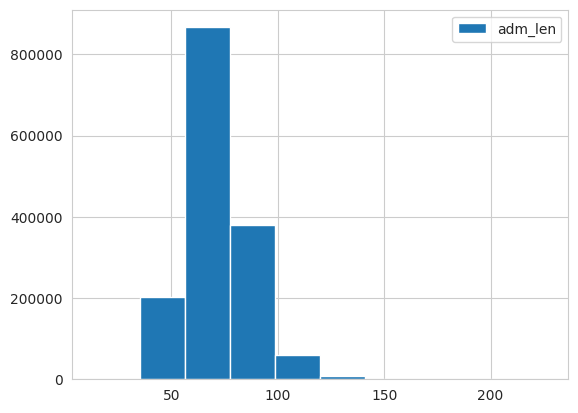

In [17]:
df.adm_len.hist(legend='y')

Длинные (больше 200 символов) названия мест в административно-территориальном делении

In [18]:
df.query('adm_len>200').adm_div

635548     Ленинградская Область, Кингисеппский Район, Мо...
644921     Ханты-Мансийский Автономный округ - Югра Автон...
649270     Ставропольский Край, Минераловодский Район, Ми...
1459309    Краснодарский Край, Тихорецкий Район, Малоросс...
1459316    Краснодарский Край, Гулькевичский Район, Мирны...
1459321    Чувашская Республика - Чувашия, Чебоксарский Р...
1459577    Краснодарский Край, Новокубанский Район, Мирск...
1459641    Краснодарский Край, Успенский Район, Мичуринск...
1459865    Краснодарский Край, Тихорецкий Район, Тихорецк...
1518003    Ханты-Мансийский Автономный округ - Югра Автон...
1518004    Ханты-Мансийский Автономный округ - Югра Автон...
1518005    Ханты-Мансийский Автономный округ - Югра Автон...
1518006    Ханты-Мансийский Автономный округ - Югра Автон...
1518007    Ханты-Мансийский Автономный округ - Югра Автон...
1518008    Ханты-Мансийский Автономный округ - Югра Автон...
1518009    Ханты-Мансийский Автономный округ - Югра Автон...
1518010    Ханты-Мансийс

#### Количество слов в адресе

In [19]:
df['adm_adr_word_count'] = df.adm_div.apply(lambda x: len(x.split()))

<Axes: >

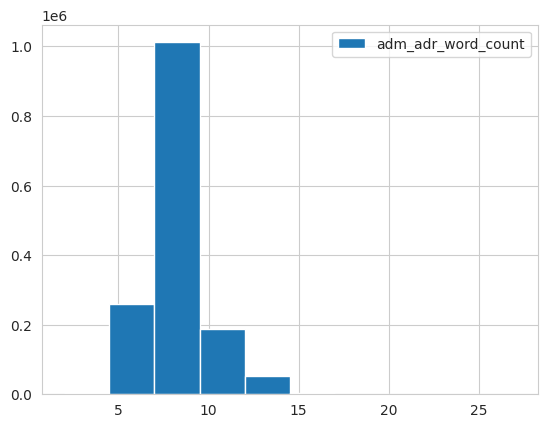

In [20]:
df.adm_adr_word_count.hist(legend='y')

In [21]:
df.adm_adr_word_count.mean()

8.2294205496015

### Дополнительно. Справочники сокращений типов адресообразующих элементов

Дополнительно составим справочник сокращений. Он будет использоваться при аугментации данных - генерации возможных вариантов написания адреса.

In [23]:
cdf = df[['city_type_name', 'city_type_name_short']].copy()
cdf.drop_duplicates(inplace=True)
cdf = cdf.rename(columns={'city_type_name':'type_name', 'city_type_name_short': 'type_name_short'})

In [24]:
tdf = df[['territory_type_name', 'territory_type_name_short']].copy()
tdf.drop_duplicates(inplace=True)
tdf = tdf.rename(columns={'territory_type_name': 'type_name', 'territory_type_name_short': 'type_name_short'})

In [25]:
sdf = df[['street_type_name', 'street_type_name_short']].copy()
sdf.drop_duplicates(inplace=True)
sdf = sdf.rename(columns={'street_type_name': 'type_name', 'street_type_name_short': 'type_name_short'})

In [26]:
adf = df[['area_type_name', 'area_type_name_short']].copy()
adf.drop_duplicates(inplace=True)
adf = adf.rename(columns={'area_type_name': 'type_name', 'area_type_name_short': 'type_name_short'})

In [27]:
rdf = df[['region_type_name', 'region_type_name_short']].copy()
rdf.drop_duplicates(inplace=True)
rdf = rdf.rename(columns={'region_type_name':'type_name', 'region_type_name_short': 'type_name_short'})

Объединяем все справочники в 1 чистим дубликаты и сохраняем в файл

In [28]:
types_df = pd.concat([cdf, sdf, rdf, tdf, sdf])
types_df.drop_duplicates(inplace=True)
types_df.to_csv("types.csv")